In [2]:
import sys
sys.path.insert(0, 'C:/Users/Can/Dropbox/PC (2)/Desktop/My Numerical Calculations/Single Particle/Kagome')
from Kagome_Matrix_in_k_space import *

t1= -1 L1= 0.28 t2= 0.3 L2= 0.2


<IPython.core.display.Javascript object>


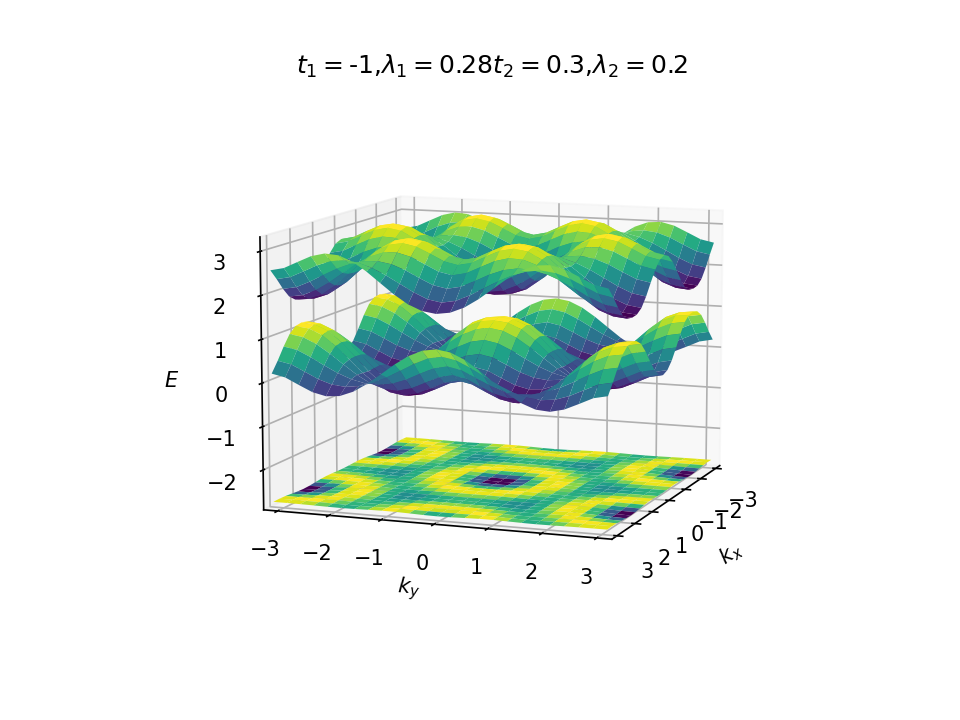

In [12]:
size = 3
m=n=25

# Kagome için kare mesh (Sadece FBZ değil, bu yüzden sadece görselleştirme için bir mesh, aslında doğru değil)
kx_range = np.linspace(np.pi, -np.pi, num=m)
ky_range = np.linspace(np.pi, -np.pi, num=n)
                
energies = np.zeros((m,n,size), dtype=complex) #3D bant için
for i in range(m):
    for j in range(n):
        kx=kx_range[i];ky=ky_range[j]
        k1=kx;k2=kx/2+ky*np.sqrt(3)/2;k3=k2-k1
        H = Hamiltonian(k1, k2, k3)
        evals, evecs = np.linalg.eigh(H)
        energies[i,j,:]=evals
        
import matplotlib.pyplot as plt
%matplotlib notebook 

X, Y = np.meshgrid(kx_range, ky_range)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.axis([X.min(), X.max(), Y.min(), Y.max()])
for band in range(size):
    ax.plot_surface(X,Y, energies[:,:,band], cmap='viridis')
ax.set_xlabel(r'$k_{x}$')
ax.set_ylabel(r'$k_{y}$')
ax.set_zlabel(r'$E$')
ax.set_title(r'$t_1=$'+str(t1)+','+r'$\lambda_1=$'+str(L1)+r'$t_2=$'+str(t2)+','+r'$\lambda_2=$'+str(L2))
ax.view_init(azim=0, elev=0)
plt.show() 